# Understand the dataset

We will load the dataset, inspect its structure, and Clean the dataset (if needed) to get the data ready for analysis.

### 1. Load and inspect the dataset

In [18]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = r"C:\Users\Serge Nane\OneDrive - Diageo\Desktop (2)\DSC530 EDA\survey.csv"
df = pd.read_csv(file_path)

# Inspect the dataset
print("First few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

First few rows:
         Timestamp  Age  Gender         Country state self_employed  \
0  8/27/2014 11:29   37  Female   United States    IL           NaN   
1  8/27/2014 11:29   44       M   United States    IN           NaN   
2  8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3  8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4  8/27/2014 11:30   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often          25-Jun  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely          25-Jun  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1         

### 2. Cleaning data
In this section, We will:

#### Invalid Values in Age (Handle outlier):

1. Removed rows with negative or extremely high ages.

2. Define a reasonable age range

#### Standardize Gender:

1. Mapped all variations of "Male" and "Female" to consistent values.

2. Grouped less common gender identities into "Other."

#### Handle Missing Values:

1. Imputed missing values in categorical columns (state, self_employed, work_interfere) with the mode.

2. Imputed missing values in numerical columns (Age) with the mean.

#### Drop Irrelevant Columns:

Dropped the comments column (mostly empty) and the Timestamp column (not relevant for analysis).

#### Encode Categorical Variables:

Encoded work_interfere and no_employees numerically for analysis.

#### Standardize and Encode no_employees:

1. Fix typos (e.g., '25-Jun' → '26-100').

2. Map categorical values to numerical codes.

3. Impute missing values with the mode.

#### Encode work_interfere Numerically:

1. Map categorical values to numerical codes.

2. Impute missing values with the mode.


In [24]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = r"C:\Users\Serge Nane\OneDrive - Diageo\Desktop (2)\DSC530 EDA\survey.csv"
df = pd.read_csv(file_path)

# Inspect the dataset
df.head()

# Step 1: Handle Invalid Values in 'Age'
# Remove rows with invalid ages (negative or extremely high)
print("\nAge distribution before cleaning:")
print(df['Age'].describe())

# Define a reasonable age range (e.g., 15 to 100)
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

# Re-check descriptive statistics
print("\nAge distribution after cleaning:")
print(df['Age'].describe())

# Step 2: Standardize 'Gender' Column
# Simplify gender values to 'Male', 'Female', and 'Other'
gender_mapping = {
    'Female': 'Female', 'female': 'Female', 'F': 'Female', 'f': 'Female', 'Femake': 'Female',
    'Cis Female': 'Female', 'Cis female': 'Female', 'Female (cis)': 'Female', 'Female (trans)': 'Female',
    'Male': 'Male', 'male': 'Male', 'M': 'Male', 'm': 'Male', 'Mail': 'Male', 'Make': 'Male',
    'Cis Male': 'Male', 'Cis male': 'Male', 'Cis Man': 'Male', 'Male (CIS)': 'Male', 'Male-ish': 'Male',
    'msle': 'Male', 'Malr': 'Male', 'Man': 'Male', 'ostensibly male, unsure what that really means': 'Male',
    'queer/she/they': 'Other', 'non-binary': 'Other', 'Genderqueer': 'Other', 'Androgyne': 'Other',
    'Agender': 'Other', 'Enby': 'Other', 'Neuter': 'Other', 'fluid': 'Other', 'queer': 'Other',
    'A little about you': 'Other', 'Nah': 'Other', 'All': 'Other', 'Guy (-ish) ^_^': 'Other',
    'something kinda male?': 'Other'
}
df['Gender'] = df['Gender'].map(gender_mapping).fillna('Other')  # Map and fill unknown values with 'Other'

# Step 3: Handle Missing Values
# For categorical variables: Impute with mode
categorical_cols = ['state', 'self_employed', 'work_interfere']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Assign back to DataFrame

# For numerical variables: Impute with mean
numerical_cols = ['Age']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())  # Assign back to DataFrame

# Step 4: Drop Irrelevant Columns
# Drop 'comments' and 'Timestamp' if they exist
columns_to_drop = ['comments', 'Timestamp']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])

# Step 5: Standardize and Encode 'no_employees'
# Inspect unique values in 'no_employees'
print("\nUnique values in 'no_employees':")
print(df['no_employees'].unique())

# Standardize 'no_employees' values
df['no_employees'] = df['no_employees'].replace({
    '25-Jun': '26-100',  # Fix typo
    '5-Jan': '1-5'       # Fix typo
})

# Encode 'no_employees' numerically
df['no_employees'] = df['no_employees'].map({
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6
})

# Handle missing values in 'no_employees' after encoding
mode_no_employees = df['no_employees'].mode()[0]
df['no_employees'] = df['no_employees'].fillna(mode_no_employees)

# Step 6: Encode 'work_interfere' Numerically
df['work_interfere'] = df['work_interfere'].map({
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Unknown': np.nan
})

# Handle missing values in 'work_interfere' after encoding
mode_work_interfere = df['work_interfere'].mode()[0]
df['work_interfere'] = df['work_interfere'].fillna(mode_work_interfere)

# Step 7: Re-check missing values
print("\nMissing values after handling:")
print(df.isnull().sum())

# Final dataset info
print("\nFinal dataset info:")
print(df.info())

# Inspect the cleaned dataset
print("\nFirst few rows of cleaned dataset:")
df.head()


Age distribution before cleaning:
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

Age distribution after cleaning:
count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

Unique values in 'no_employees':
['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']

Missing values after handling:
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,No,No,Yes,3.0,3,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,No,No,No,1.0,6,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,CA,No,No,No,1.0,3,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,CA,No,Yes,Yes,3.0,3,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,No,No,No,0.0,4,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Formulate a Statistical Question

### Question:
### "What factors influence the likelihood of seeking mental health treatment among employees?"

This question allows us to analyze multiple variables, including:

1. Dependent Variable: treatment (Yes/No).

2. Independent Variables: family_history, Age, Gender, work_interfere, no_employees.

## Variables selection and Beginning of the Analysis
#### 1: Select 5 Variables

We will analyze the following variables:

#### Dependent Variable:

treatment: Whether the respondent sought treatment (Yes/No).

#### Independent Variables:

1. family_history: Family history of mental health issues (Yes/No).

2. Age: Age of the respondent (numeric).

3. Gender: Gender of the respondent (Male/Female/Other).

4. work_interfere: How often mental health interferes with work (0 = Never, 1 = Rarely, 2 = Sometimes, 3 = Often).

5. no_employees: Number of employees in the company (1 = 1-5, 2 = 6-25, 3 = 26-100, 4 = 100-500, 5 = 500-1000, 6 = More than 1000).

#### 2. Single Variable Analysis
We WIll create histograms and calculate descriptive statistics for each variable.

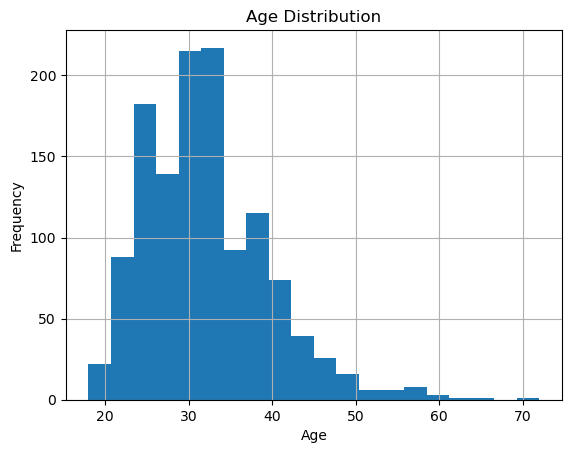

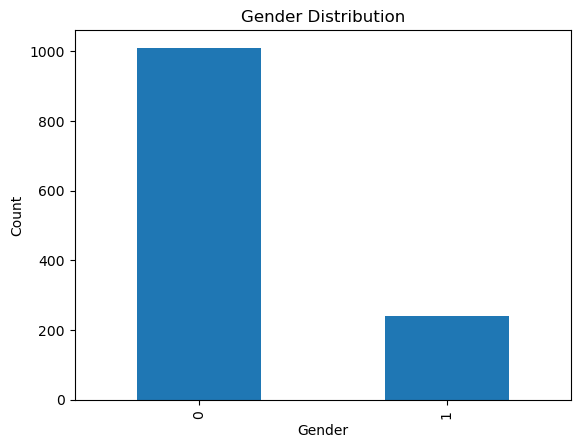

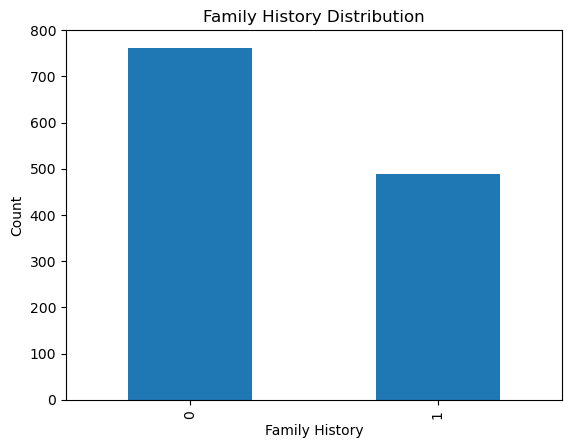

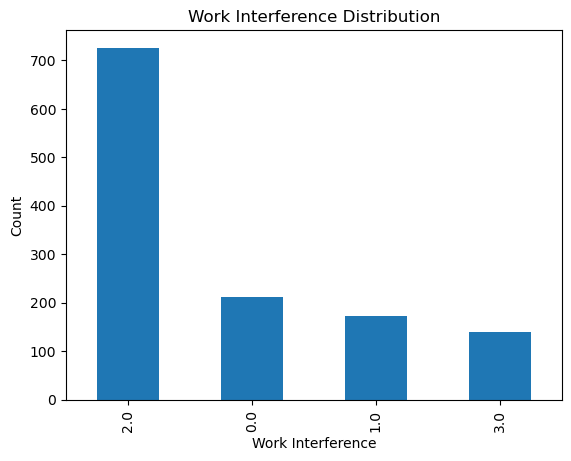

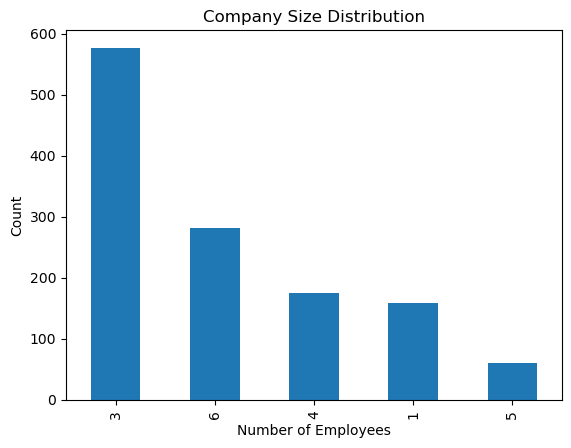


Age - Tails and Skewness:
Min: 18, Max: 72, Skewness: 1.0117121019539657

Gender - Mode:
Mode: 0

Family History - Mode:
Mode: 0

Work Interfere - Mode:
Mode: 2.0

Number of Employees - Mode:
Mode: 3


In [32]:
import matplotlib.pyplot as plt

# Histogram for Age
df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Gender
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for family_history
df['family_history'].value_counts().plot(kind='bar')
plt.title('Family History Distribution')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

# Bar plot for work_interfere
df['work_interfere'].value_counts().plot(kind='bar')
plt.title('Work Interference Distribution')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

# Bar plot for no_employees
df['no_employees'].value_counts().plot(kind='bar')
plt.title('Company Size Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.show()

from scipy.stats import skew

# Function to calculate tails and skewness
def describe_tails(data):
    min_val = data.min()
    max_val = data.max()
    skewness = skew(data)
    return min_val, max_val, skewness

# Descriptive statistics for Age
age_min, age_max, age_skewness = describe_tails(df['Age'])
print("\nAge - Tails and Skewness:")
print(f"Min: {age_min}, Max: {age_max}, Skewness: {age_skewness}")

# Descriptive statistics for Gender (categorical, so we calculate mode and distribution)
gender_mode = df['Gender'].mode()[0]
print("\nGender - Mode:")
print(f"Mode: {gender_mode}")

# Descriptive statistics for family_history (categorical, so we calculate mode and distribution)
family_history_mode = df['family_history'].mode()[0]
print("\nFamily History - Mode:")
print(f"Mode: {family_history_mode}")

# Descriptive statistics for work_interfere (categorical, so we calculate mode and distribution)
work_interfere_mode = df['work_interfere'].mode()[0]
print("\nWork Interfere - Mode:")
print(f"Mode: {work_interfere_mode}")

# Descriptive statistics for no_employees (categorical, so we calculate mode and distribution)
no_employees_mode = df['no_employees'].mode()[0]
print("\nNumber of Employees - Mode:")
print(f"Mode: {no_employees_mode}")

### Key Insights
#### Age:

The dataset is dominated by younger respondents, with a right-skewed distribution.

This suggests that younger employees are more represented in the dataset.

#### Gender:

Males are the most common respondents, which may influence the analysis of treatment-seeking behavior.

#### Family History:

Most respondents do not have a family history of mental health issues, but those who do are more likely to seek treatment (as seen in earlier analysis).

#### Work Interfere:

Mental health sometimes interferes with work for most respondents, but those who report often are much more likely to seek treatment.

#### Number of Employees:

The dataset is dominated by employees from medium-sized companies (26-100 employees).



## Explore Relationships Between Variables

### Step 1: Compare Variables
We will compare treatment rates across different groups using PMFs and CDFs.

Treatment rates by family history:
family_history  treatment
No              No           0.645669
                Yes          0.354331
Yes             Yes          0.740286
                No           0.259714
Name: proportion, dtype: float64

Treatment rates by work interference:
work_interfere  treatment
0.0             No           0.858491
                Yes          0.141509
1.0             Yes          0.705202
                No           0.294798
2.0             No           0.502755
                Yes          0.497245
3.0             Yes          0.850000
                No           0.150000
Name: proportion, dtype: float64


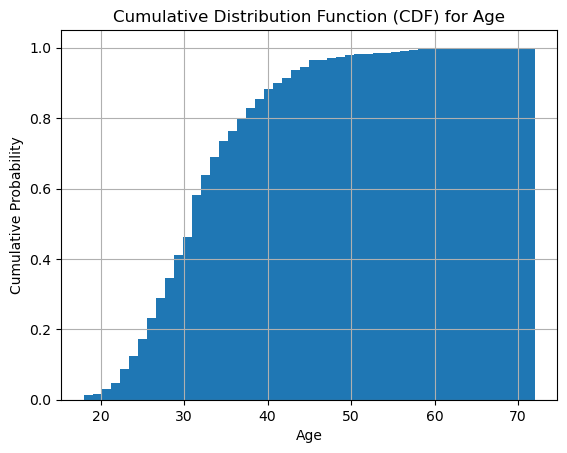

In [27]:
# PMF: Treatment rates by family history
treatment_by_family = df.groupby('family_history')['treatment'].value_counts(normalize=True)
print("Treatment rates by family history:")
print(treatment_by_family)

# PMF: Treatment rates by work interference
treatment_by_work = df.groupby('work_interfere')['treatment'].value_counts(normalize=True)
print("\nTreatment rates by work interference:")
print(treatment_by_work)

# CDF for Age
df['Age'].hist(cumulative=True, density=1, bins=50)
plt.title('Cumulative Distribution Function (CDF) for Age')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.show()

### 1. CDF for Age
Description: The Cumulative Distribution Function (CDF) shows the cumulative probability of ages in the dataset.

### Insight:

1.1. By age 30, approximately 50% of respondents are accounted for.

1.2. By age 40, approximately 80% of respondents are accounted for.

##### This confirms that the majority of respondents are between 20 and 40 years old.

### 2. Treatment Rates by Family History
#### 2.1. No Family History:

. No Treatment: 64.57%

. Sought Treatment: 35.43%

#### 2.2 Family History:

. Sought Treatment: 74.03%

. No Treatment: 25.97%

### Insight:

##### Employees with a family history of mental health issues are much more likely to seek treatment (74.03%) compared to those without a family history (35.43%).

This suggests that family_history is a strong predictor of treatment-seeking behavior.

### 3. Treatment Rates by Work Interference
. Never (0.0):

. No Treatment: 85.85%

. Sought Treatment: 14.15%

. Rarely (1.0):

. Sought Treatment: 70.52%

. No Treatment: 29.48%

. Sometimes (2.0):

. No Treatment: 50.28%

. Sought Treatment: 49.72%

. Often (3.0):

. Sought Treatment: 85.00%

. No Treatment: 15.00%

### Insight:

##### Employees who report that mental health often interferes with their work are much more likely to seek treatment (85.00%) compared to those who report never experiencing interference (14.15%).

This suggests that work_interfere is also a strong predictor of treatment-seeking behavior.



## Test Hypotheses and Regression Analysis

### 1. Hypothesis Testing:

1.1 Use a chi-square test to evaluate the relationship between family_history and treatment.

1.2 Use a chi-square test to evaluate the relationship between work_interfere and treatment.

### 2. Regression Analysis:

2.1 Perform logistic regression to quantify the influence of the 5 variables (family_history, Age, Gender, work_interfere, no_employees) on treatment-seeking behavior.

In [28]:
# Hypothesis Testing

from scipy.stats import chi2_contingency

# Chi-square test for family_history and treatment
contingency_table_family = pd.crosstab(df['family_history'], df['treatment'])
chi2_family, p_family, dof_family, expected_family = chi2_contingency(contingency_table_family)
print(f"Chi-square statistic (family_history): {chi2_family}")
print(f"P-value (family_history): {p_family}")

# Chi-square test for work_interfere and treatment
contingency_table_work = pd.crosstab(df['work_interfere'], df['treatment'])
chi2_work, p_work, dof_work, expected_work = chi2_contingency(contingency_table_work)
print(f"Chi-square statistic (work_interfere): {chi2_work}")
print(f"P-value (work_interfere): {p_work}")

Chi-square statistic (family_history): 175.95516961872426
P-value (family_history): 3.703610823400622e-40
Chi-square statistic (work_interfere): 206.6291203303157
P-value (work_interfere): 1.5584009439458798e-44


In [29]:
# Regression Analysis

import statsmodels.api as sm

# Convert categorical variables to numeric
df['family_history'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0, 'Other': 0})  # Encode Gender as binary (Female = 1, Male/Other = 0)

# Add a constant for the intercept term
X = sm.add_constant(df[['family_history', 'Age', 'Gender', 'work_interfere', 'no_employees']])
y = df['treatment']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.571305
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                 1251
Model:                          Logit   Df Residuals:                     1245
Method:                           MLE   Df Model:                            5
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.1757
Time:                        08:25:53   Log-Likelihood:                -714.70
converged:                       True   LL-Null:                       -867.06
Covariance Type:            nonrobust   LLR p-value:                 9.708e-64
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.8012      0.365     -7.682      0.000      -3.516      -2.087
family_history   

### Key Insights
#### Strong Predictors:

. family_history, Gender, and work_interfere are strong predictors of treatment-seeking behavior.

. Employees with a family history, females, and those who report frequent work interference are more likely to seek treatment.

#### Weak Predictor:

. Age has a small but statistically significant effect on treatment-seeking behavior.

#### Non-Significant Predictor:

. no_employees does not significantly influence treatment-seeking behavior.

## Data Visualization

### 1. Histogram for Age


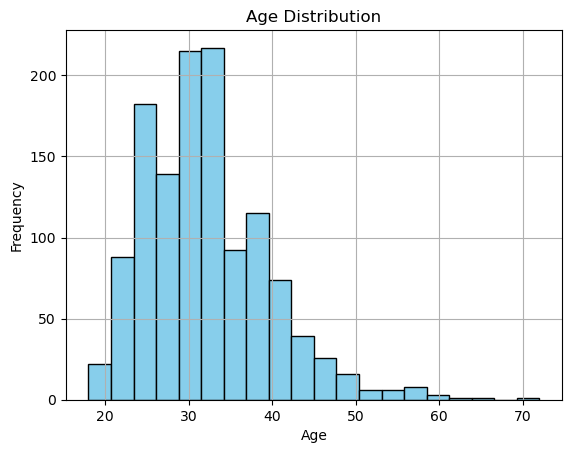

In [33]:
import matplotlib.pyplot as plt

# Histogram for Age
df['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### 2. Bar Plot for Gender

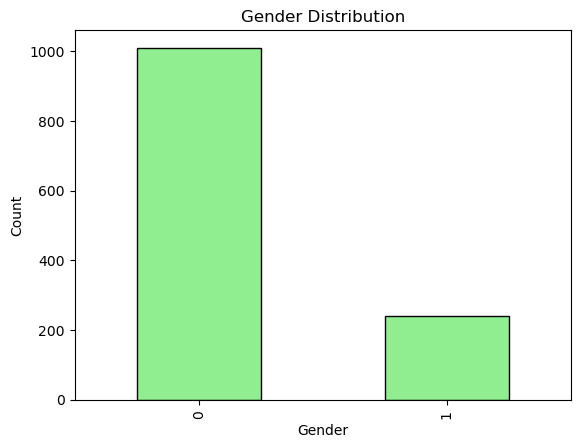

In [34]:
# Bar plot for Gender
df['Gender'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 3. Bar Plot for Family History

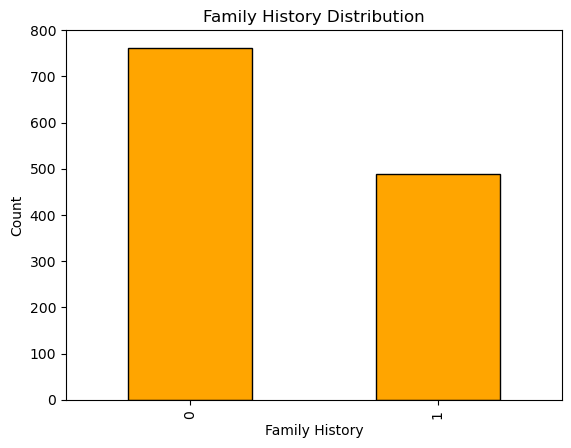

In [35]:
# Bar plot for family_history
df['family_history'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Family History Distribution')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

### 4. Bar Plot for Work Interfere

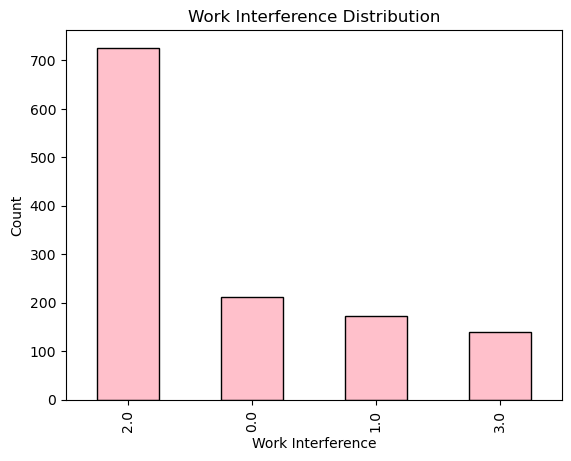

In [36]:
# Bar plot for work_interfere
df['work_interfere'].value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.title('Work Interference Distribution')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

### 5. Bar Plot for Number of Employees

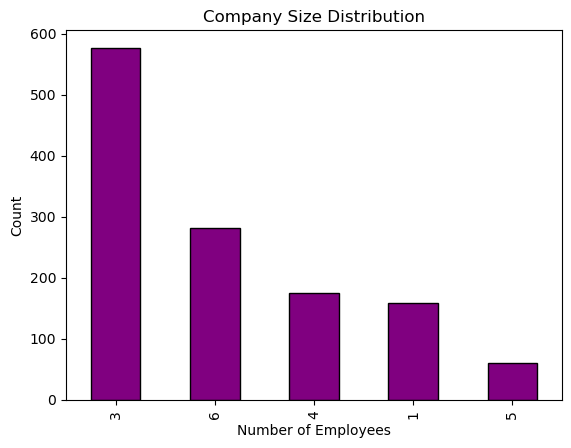

In [37]:
# Bar plot for no_employees
df['no_employees'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Company Size Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.show()

### 6. PMF: Treatment Rates by Family History

Treatment rates by family history:
family_history  treatment
0               0            0.645669
                1            0.354331
1               1            0.740286
                0            0.259714
Name: proportion, dtype: float64


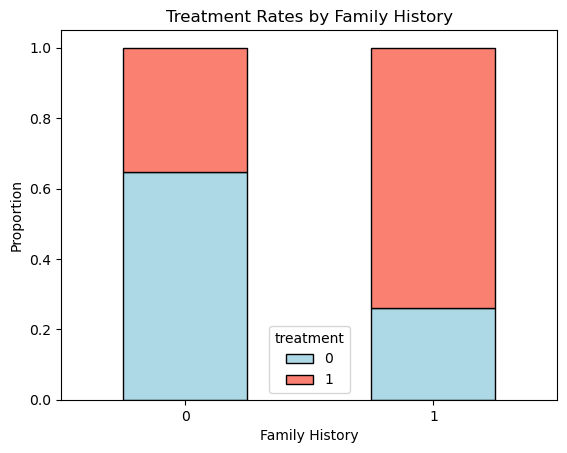

In [38]:
# PMF: Treatment rates by family history
treatment_by_family = df.groupby('family_history')['treatment'].value_counts(normalize=True)
print("Treatment rates by family history:")
print(treatment_by_family)

treatment_by_family.unstack().plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Treatment Rates by Family History')
plt.xlabel('Family History')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

### 7. PMF: Treatment Rates by Work Interfere


Treatment rates by work interference:
work_interfere  treatment
0.0             0            0.858491
                1            0.141509
1.0             1            0.705202
                0            0.294798
2.0             0            0.502755
                1            0.497245
3.0             1            0.850000
                0            0.150000
Name: proportion, dtype: float64


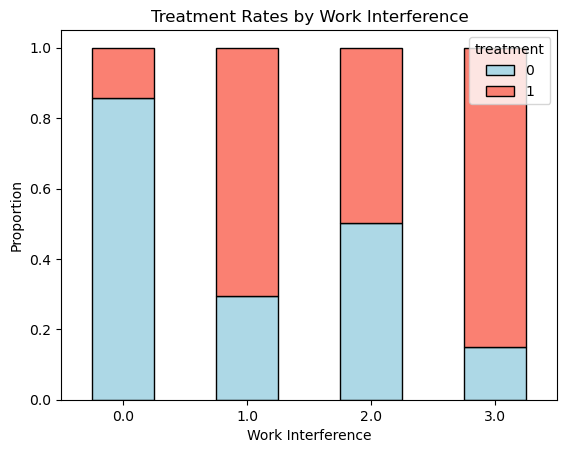

In [39]:
# PMF: Treatment rates by work interference
treatment_by_work = df.groupby('work_interfere')['treatment'].value_counts(normalize=True)
print("\nTreatment rates by work interference:")
print(treatment_by_work)

treatment_by_work.unstack().plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Treatment Rates by Work Interference')
plt.xlabel('Work Interference')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

### 8. CDF for Age

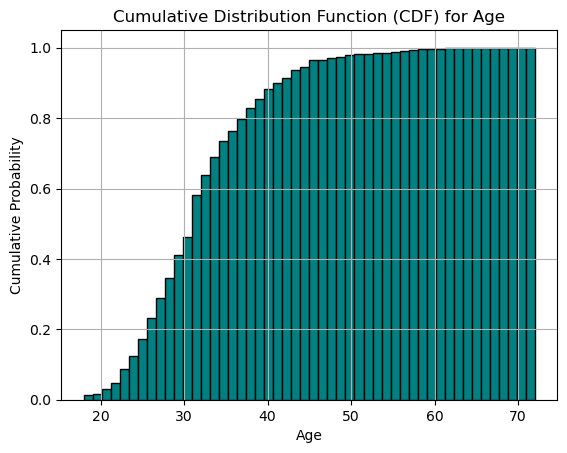

In [40]:
# CDF for Age
df['Age'].hist(cumulative=True, density=1, bins=50, color='teal', edgecolor='black')
plt.title('Cumulative Distribution Function (CDF) for Age')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.show()

### 9. Scatter Plot: Age vs. Treatment

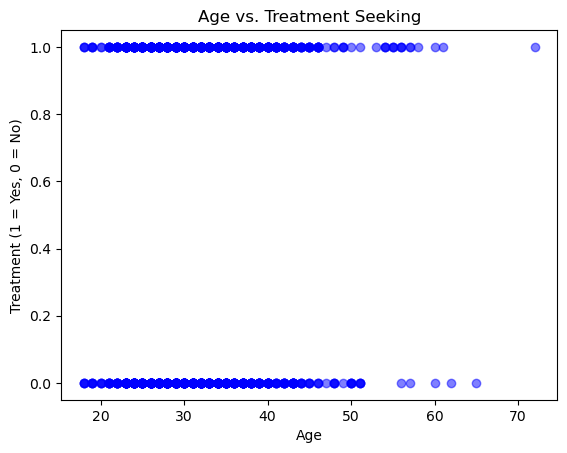

In [41]:
# Scatter plot: Age vs. Treatment
plt.scatter(df['Age'], df['treatment'], alpha=0.5, color='blue')
plt.title('Age vs. Treatment Seeking')
plt.xlabel('Age')
plt.ylabel('Treatment (1 = Yes, 0 = No)')
plt.show()

### 10. Scatter Plot: Work Interfere vs. Treatment

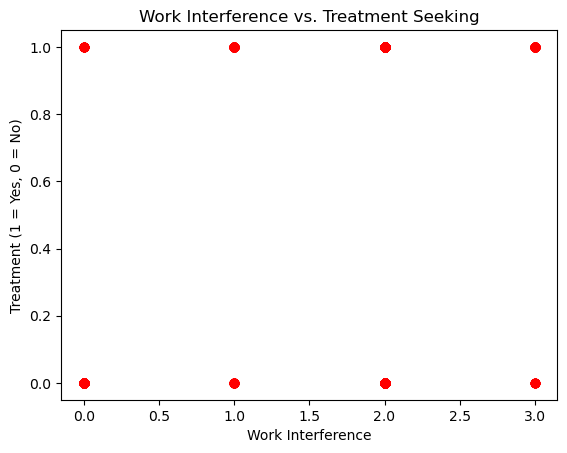

In [42]:
# Scatter plot: Work Interfere vs. Treatment
plt.scatter(df['work_interfere'], df['treatment'], alpha=0.5, color='red')
plt.title('Work Interference vs. Treatment Seeking')
plt.xlabel('Work Interference')
plt.ylabel('Treatment (1 = Yes, 0 = No)')
plt.show()

In [43]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = r"C:\Users\Serge Nane\OneDrive - Diageo\Desktop (2)\DSC530 EDA\survey_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: C:\Users\Serge Nane\OneDrive - Diageo\Desktop (2)\DSC530 EDA\survey_cleaned.csv
